# Maximum Likelihood and Applications in Astronomy

D, Jevremović (with material from M. Jurić 2017,  G. Richards 2016,Ivezić [Sections 4.0, 4.1, 4.2.1-6, 4.3](chap4.pdf), Bevington, and Leighly).

## Statistical Inference

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.

Three examples of inference are:
1. What is the best estimate for a model parameter
2. How confident we are about our result
3. Are the data consistent with a particular model/hypothesis

## Frequentist vs. Bayesian Inference

There are two major statistical paradigms which address the statistical inference questions: the classical, or **frequentist** paradigm, and the **Bayesian** paradigm.

While most of statistics and machine learning is based on the classical paradigm, Bayesian techniques are being embraced by the statistical and scientific communities at an ever-increasing pace.

This week we begin by discussing the three main types of statistical inference from the classical (frequentist) point of view. Next week, we'll tackle the same problems from Bayesian point of view.

## Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. The population doesn't have to refer to different objects. E.g., we may be (re)measuring the position of an object at rest; the population is the distribution of (an infinite number of) measurements smeared by the error, and the sample are the measurement we've actually taken.
* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic.
* To conclude something about the population from the sample, we develop ***estimators***. An estimator is a statistic, a rule for calculating an estimate of a given quantity based on observed data: thus the rule (the estimator), the quantity of interest (the estimand) and its result (the estimate) can be distinguished. Sometimes *estimator* and the *estimate* are used interchangeably. Much of frequentist statistics concerns itself with development of different estimation rules -- different estimators -- and proving their properties.
* There are ***point*** and ***interval estimators***. The point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).

## Maximum Likelihood Estimation (MLE)

Let's talk about maximum likelihood estimation ($\S 4.2$ in the textbook), which is relevant to both Bayesian and Frequentist approaches.

## Maximum Likelihood Approach

Maximum likelihood estimation consists of the following conceptual steps:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, this could be a statement that the data are a measurement of some quantity that come with Gaussian random errors (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically described using a set of model parameters $\boldsymbol{\theta}$, and written as $\boldsymbol{M}(\boldsymbol{\theta})$.
2. **Maximum Likelihood Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$ which maximize the ***likelihood*** $L(\boldsymbol{\theta}) \equiv p(D|M)$. This search yields the MLE *point estimates*, $\boldsymbol{\theta^0}$.
3. **Quantifying Estimate Uncertainty**: Determine the confidence region for model parameters, $\boldsymbol{\theta^0}$. Such a confidence estimate can be obtained analytically (possibly with some approximations), but can also be done numerically for arbitrary models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation.
4. **Hypothesis Testing**: Perform hypothesis tests as needed to make other conclusions about models and point estimates. Possibly GOTO #1.

While these steps represent a blueprint for the frequentist approach in general, the likelihood is just one of many possible so-called objective functions (also called fitness functions, or cost functions); other possibilities are explored briefly in §4.2.8 of the textbook.

## Example: Measuring the Position of a Quasar

Let's assume we wish to estimate the position $x$ of a quasar from a series of individual astrometric measurements.

1. We adopt a model where the observed quasar does not move, and individual measurement errors are drawn from a normal (Gaussian) distribution.
2. We derive the expression for the likelihood of there being a quasar at position $x_0$ that gives rise to our individual measurements. We find the value of $\hat x_0$ for which our observations are maximally likely.
3. We determine the error bars (confidence intervals) on our measurement.
4. We test whether what we've observed is consistent with our adopted model. For example, is it possible that the quasar was really a misidentified star with measurable proper motion?

Note: in the text to come, I will use $\mu$ instead of $x_0$ to denote the true position of the quasar. This is to avoid potential confusion with the first (or zeroth) measurement of $x$.

### The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, for the Gaussian distribution probablity of getting a specific value of $x$ is given by:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

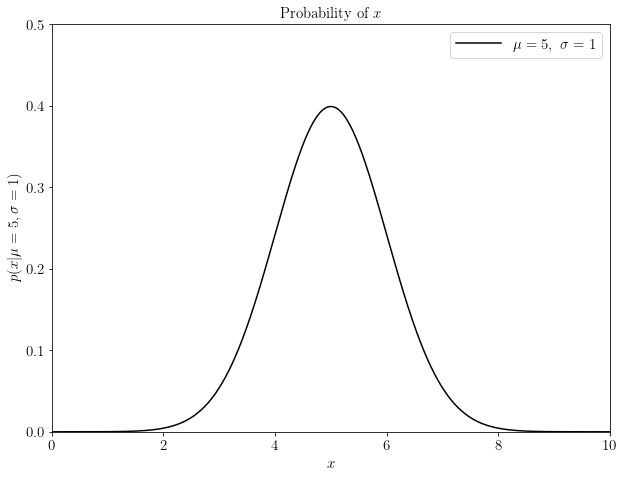

In [1]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(5, 1)
x = np.linspace(0, 10, 1000)
plt.plot(x, dist.pdf(x), c='black',label=r'$\mu=5,\ \sigma=1$')

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.title('Probability of $x$')

plt.legend()

### The Likelihood Function

If we want to know the total probability of our *entire* data set (as opposed to one measurement) then we must compute the *product* of all the individual probabilities:
$$L \equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^n p(x_i|M(\theta)),$$
where $M$ refers to the *model* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. In words, this is ***the probability of the data given the model parameters***. Note we're assuming the individual measurements are independent of each other.

If we consider $L$ as a function of the model parameters, we refer to it as the ***likelihood of the model parameters, given the observed data***. Note that while the components of $L$ may be normalized pdfs, their product is not.  Also the product can be very small, so we often take the log of $L$.

We can write this out as
$$L = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
and simplify to
$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

That is, we have done this: $$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$

If recall the last lecture, then you might notice that the argument of the exponential is just

$$\exp \left(-\frac{\chi^2}{2}\right).$$

That is, for our gaussian distribution
$$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So, maximizing the likelihood is the same as minimizing $\chi^2$.

## The Core Idea Behind Maximum Likelihood Estimators

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters).

Then Maximum Likelihood Estimation method tells us to think of the likelihood as a ***function of the unknown model parameters***, and ***find those that maximize the value of $L$***. Those will be our Maximum Likelihood Estimators for for the true values of the model.

Simple as that!

## MLE applied to a Homoscedastic Gaussian

Let's take a look at our astrometry example, using a model where all the measurements have the same error, drawn from a normal distribution, $N(0, \sigma)$.

All errors being the same is known as having **homoscedastic** errors.  Don't be intimidated by the word, statisticians just like to sound smart, so they say "homoscedastic" instead of "uniform errors".  Later we will consider the case where the measurements can have different errors ($\sigma_i$) which is called **heteroscedastic**.

We have an experiment with the set of measured positions $D=\{x_i\}$ in 1D with Gaussian errors, and therefore:

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Note that that is $p(\{x_i\})$ not $p(x_i)$, that is the probability of the full data set, not just one measurement. If $\sigma$ is both constant and *known*, then this is a one parameter model with $k=1$ and $\theta_1=\mu$. 

For practical (and some theoretical) reasons, it's better to work with the natural logarithm of the likelihood.

We define the *log-likelihood function* as ${\rm lnL} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$. Given all that, we have:

$${\rm lnL} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote

$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma^2} = 0.$$

(note: we should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$)

(also note: any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored.)

Since $\sigma = {\rm constant}$, that says 
$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that
$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$
which is just the arithmetic mean of all the measurements.

### The Sample Mean is an ML Estimator

The mean of observations drawn from a $N(\mu, \sigma=const)$ distribution is a maximum-likelihood estimator of the distribution's $\mu$ parameter.

We'd intuitively guess that (and we often do), but this derivation clarifies our choice: as an estimator of the real value of $\mu$, we adopt the value $\hat \mu$ with which it's maximally likely for the measured data set to occur.

It also exposes the ***assumptions*** behind this conclusion; namely homoscedasticity and gaussianity of errors. For example, if our errors were Cauchy-distributed, the mean of the sample won't be a good estimator (google for "Cauchy mean").

### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**; that is, they can be proven to converge to the true parameter value as the number of data points increases.
* **They are asymptotically normal estimators**. The distribution of the parameter estimate, as the number of data points increases to infinity, approaches a normal distribution, centered at the MLE, with a certain spread. This spread can often be easily calculated and used as a confidence band around the estimate, as discussed below (see eq. 4.7).
* **They asymptotically achieve the theoretical minimum possible variance, called the Cramér–Rao bound**. In other words, they achieve the best possible error given the data at hand; that is, no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate (see eq. 3.33 in the textbook).

## Quantifying Estimate Uncertainty

Let's simulate 10 measurements ${x_i}$ drawn from a Gaussian with $\mu = 5$ and $\sigma = 1$, and compute the ML estimator for $\mu$.

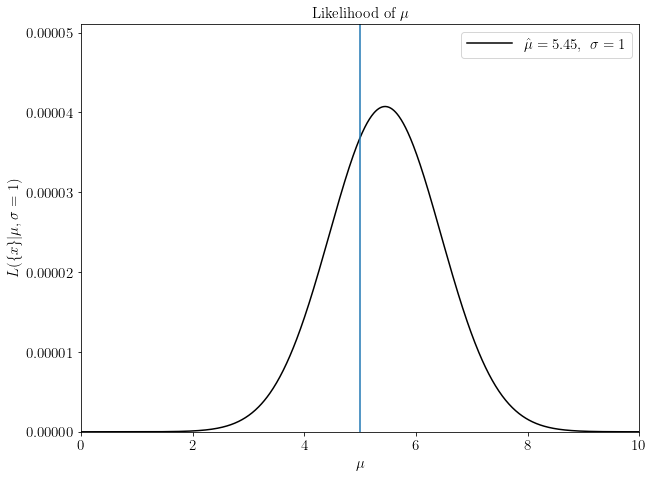

In [2]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=10
measurements = np.random.normal(5, 1, Nsamples)
mu = np.average(measurements)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(mu, 1)
C = (1./(2.*np.pi))**(10./2.)
x = np.linspace(0, 10, 1000)
plt.plot(x, C* dist.pdf(x), c='black',label=r'$\hat\mu=%.2f,\ \sigma=1$' % mu)
#plt.plot([159.9,160.1],[0,0.8], ls=ls, color='k', label=r'%s $\mu=%i' % (lab, mu))
plt.axvline(x=5)

plt.xlim(0, 10)
plt.ylim(0, 0.5*C)

plt.xlabel('$\mu$')
plt.ylabel(r'$L(\{x\}|\mu,\sigma=1)$')
plt.title('Likelihood of $\mu$')

plt.legend()

## Quantifying Estimate Uncertainty

As you've seen on in the previous plot, our ML estimate of $\mu$ is not perfect. The uncertaintly of the estimate is captured by the likelihood function (and we'll get back to this next week, in the Bayesian contect), but we'd like to quantify it with a few numbers.

We *define* the uncertainty on our MLEs as second (partial) derivatives of log-likelihood:

$$\sigma_{jk} = \left( - \frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\hat \theta}\right)^{-1/2}.$$

Taken together, these entries (more accurately, their squares) are know as the *covariance matrix*.

The marginal error bars for each parameter, $\theta_i$ are given by the diagonal elements, $\sigma_{ii}$. These are the "error bars" that are typically quoted with each measurement.

In our example, the uncertainly on the mean is 
$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

We find
$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$
since, again, $\sigma = {\rm constant}$.  

Then $$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with.

### What is $\pm \sigma$? Errors as Gaussian Approximations to the Likelihood Function

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor series and retaining terms up to second order (essentially, $\ln L$ is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, around its maximum). If this expansion is exact (as is the case for a Gaussian error distribution), then we've completely captured the error information.

In general, this is not the case and the likelihood surface can significantly deviate from a smooth elliptical surface. Furthermore, it often happens in practice that the likelihood surface is multimodal. It is always a good idea to visualize the likelihood surface when in doubt (see examples in §5.6 in the textbook).

### What is $\pm \sigma$? Errors as Gaussian Approximations to the Likelihood Function

The $(\hat \mu - \sigma_\mu, \hat \mu + \sigma_\mu)$ range gives us a **confidence interval**.

In frequentist interptetation, if we repeated the same measurement a hundred times, we'd find for 68 experiments the true value was within their computed confidence intervals ($1 \sigma$ errors).

### MLE applied to a Heteroscedastic Gaussian

Now let's look a case where the errors are heteroscedastic.  For example if we are measuring the length of a rod and have $N$ measurements, $\{x_i\}$, where the error for each measurement, $\sigma_i$ is known.  Since $\sigma$ is not a constant, then following the above, we have

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} = \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

yields a MLE solution of 
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$




## Goodness of Fit

The MLE approach tells us what the "best" model parameters are, but not how good the fit actually is.  If the model is wrong, "best" might not be particularly revealing!  For example, if you have $N$ points drawn from a linear distribution, you can always fit the data perfectly with an $N-1$ order polynomial.  But that won't necessarily perfectly predict future measurements.

We can describe the **goodness of fit** in words simply as whether or not it is likely to have obtained $\ln L_0$ by randomly drawing from the data.  That means that we need to know the *distribution* of $\ln L$.  

## Goodness of Fit

For the Gaussian case we have just described, we can write

$$z_i = (x_i-\mu)/\sigma,$$ then
$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z^2 = {\rm constant} - \frac{1}{2}\chi^2.$$

Here, $\chi^2$ is the same thing that you may already be familar with and whose distribution we discussed last week. So **$\ln L$ is distributed as $\chi^2$ (with $N-k$ degrees of freedom).**

## Goodness of Fit

What does that tell us?

The expectation value for the $\chi^2$ distribution is $N − k$ and its standard deviation is $\sqrt{2(N − k)}$. We typically have $N \gg k$ (where $N$ is the number of data points, and $k$ is the number of parameters in the model). When that holds, it becomes useful to define **$\chi^2$ per degree of freedom, $\chi^2_{dof}$**, as:

$$\chi^2_{dof} = \frac{1}{N-k}\sum_{i=1}^N z^2_i.$$

Therefore, for a good fit we would expect that $\chi^2_{dof}\approx 1$ (the expectation value).  If $\chi^2_{dof}$ is significantly larger than 1 (how much larger?), then it is likely that we are not using the correct model.

We can also get overly high or low values of $\chi^2_{dof}$ if our errors are under- or over-estimated.

## Goodness of Fit: An Example

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_chi2_eval_1.png)


## Summary

So far we heard about:

* Classical vs. Bayesian Inference (more next week)
* Likelihood function
* Maximum Likelihood Estimation
  * Homoscedastic Samples
  * Heteroscedastic Samples
* Assessing the goodness of Fit

### Truncated/Censored Data and Other Cost Functions

Note that dealing with missing data points ("censored data") adds complications that we don't have time to get into here, but see Textbook 4.2.7  Also maximum likelihood is just one possible "cost function", see Textbook, 4.2.8. 

### In the next part

Other important things that we are skipping over right now include: 
* Least-Squares as a Maximum Likelihood problem
* Optimal photometry as a Maximum Likelihood problem
* Confidence Estimates, particularly Bootstrap and Jackknife error estimates (Textbook $\S$4.5)
* Hypothesis testing (Textbook $\S$4.7)